In [ ]:
#Exploratory Data Analysis
#Univariate Analysis
#Bivariate Analysis
#Missing Value Treatment
#Feature Engineering
#Encoding Categorical Variables - Label Encoding - One Hot Encoding
#Modeling - Linear Regression - Lasso Regression - Ridge Regression - RandomForest - XGBoost

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df1=pd.read_csv('test.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.shape, df1.shape

((8523, 12), (5681, 11))

In [6]:
df['flag']=1
df1['flag']=0

In [7]:
df2=df.append(df1)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
flag                         8523 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 865.7+ KB


In [9]:
df.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,flag
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000,8523.0
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914,1.0
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616,0.0
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000,1.0
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400,1.0
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000,1.0
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400,1.0


In [10]:
df.Item_Identifier.nunique()

1559

In [11]:
df1.Item_Identifier.nunique()

1543

In [12]:
len(set(df1.Item_Identifier.values.tolist()) - set(df.Item_Identifier.values.tolist()))

0

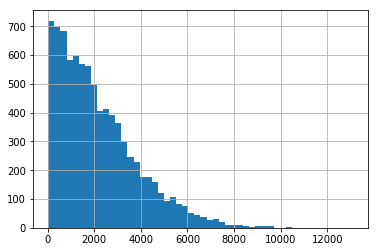

In [13]:
df.Item_Outlet_Sales.hist(bins=50)

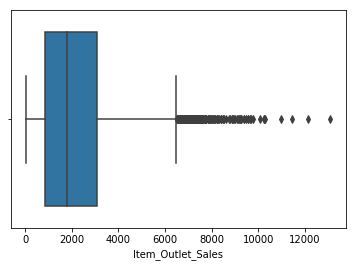

In [14]:
sns.boxplot(df.Item_Outlet_Sales)

In [15]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

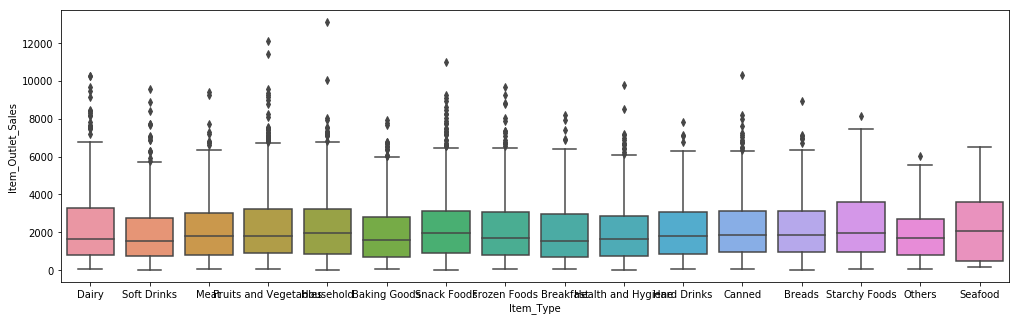

In [16]:
plt.subplots(figsize=(17,5))
sns.boxplot(x=df.Item_Type,y=df.Item_Outlet_Sales)

In [17]:
df2.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [18]:
dic = {'Low Fat' : 0, 'LF' : 0, 'low fat' : 0, 'Regular' : 1 , 'reg' : 1}

In [19]:
df2.Item_Fat_Content = df2.Item_Fat_Content.map(dic)

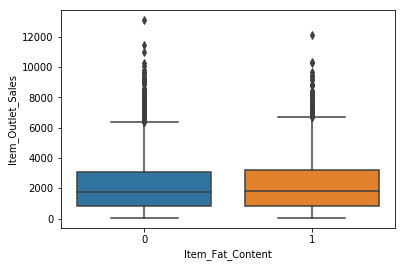

In [20]:
sns.boxplot(x=df2.Item_Fat_Content,y=df2.Item_Outlet_Sales)

In [21]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [22]:
dic2={'Small':1,'Medium':2,'High':3}

In [23]:
df2['Outlet_Size']=df2.Outlet_Size.map(dic2)

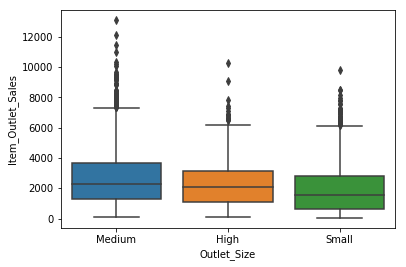

In [24]:
sns.boxplot(x=df.Outlet_Size,y=df.Item_Outlet_Sales)

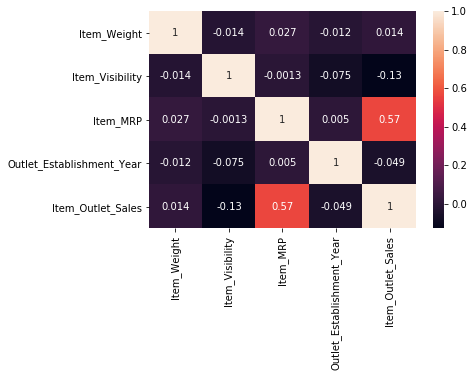

In [25]:
sns.heatmap(df[['Item_Weight','Item_Visibility','Item_MRP',
                'Outlet_Establishment_Year','Item_Outlet_Sales','Outlet_Size']].corr(),annot=True)

In [26]:
df.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [27]:
dict3={'Tier 1':1,'Tier 2':2,'Tier 3':3}

In [28]:
df2.Outlet_Location_Type=df2.Outlet_Location_Type.map(dict3)

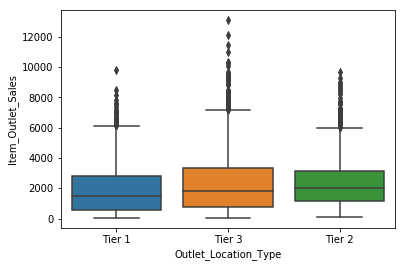

In [29]:
sns.boxplot(x=df.Outlet_Location_Type,y=df.Item_Outlet_Sales)

In [30]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [31]:
dict4={'Grocery Store':1,'Supermarket Type1':2,'Supermarket Type2':3,'Supermarket Type3' : 4}

In [32]:
df2.Outlet_Type=df2.Outlet_Type.map(dict4)

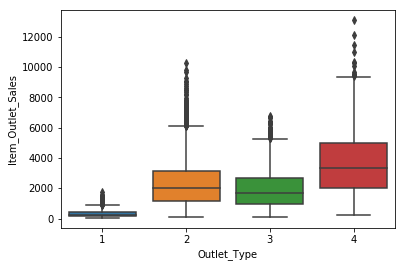

In [33]:
sns.boxplot(x=df2.Outlet_Type,y=df2.Item_Outlet_Sales)

In [34]:
len(set(df1.Outlet_Identifier.values.tolist()) - set(df.Outlet_Identifier.values.tolist()))

0

In [35]:
df2['yearsince'] = 2019-df2.Outlet_Establishment_Year

In [36]:
int_list=df.select_dtypes(exclude = 'object').columns

In [37]:
m_values = df[int_list].mean()
df_mean = df.fillna(m_values)

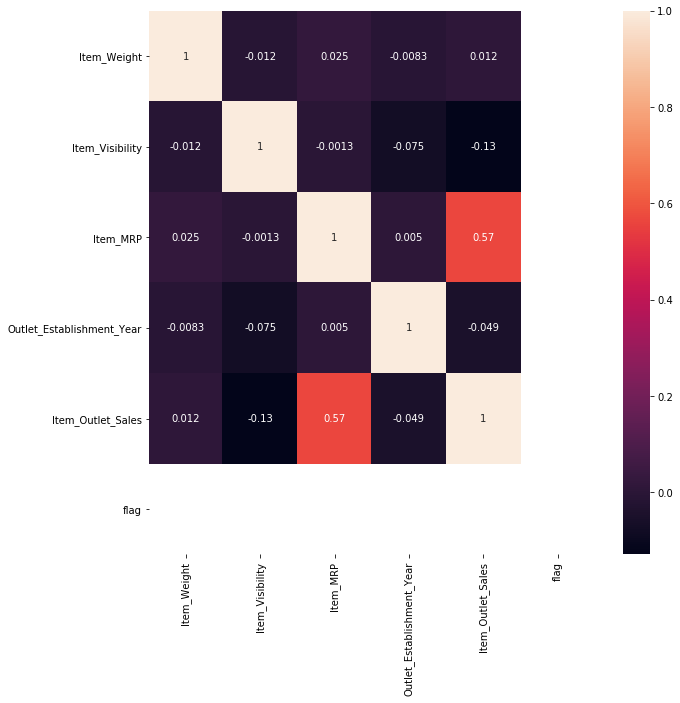

In [38]:
plt.subplots(figsize=(10,10))

sns.heatmap(df_mean.corr(),annot=True)

In [39]:
df.shape

(8523, 13)

In [40]:
df.Item_Identifier.nunique()

1559

In [41]:
iw=df2[~df2['Item_Weight'].isna()].groupby('Item_Identifier').Item_Weight.mean().reset_index()

In [42]:
df2=pd.merge(df2,iw,left_on='Item_Identifier',right_on='Item_Identifier',how='left')

In [43]:
df2['Item_Weight']=np.where(df2['Item_Weight_x'].isna(),df2['Item_Weight_y'],df2['Item_Weight_x'])

In [44]:
df2=df2.drop(['Item_Weight_x','Item_Weight_y'],1)

In [45]:
visible=df2[df2['Item_Visibility']!=0].groupby(['Outlet_Identifier','Item_Type']).Item_Visibility.mean().reset_index()

In [46]:
df2=pd.merge(df2,visible,on=['Outlet_Identifier','Item_Type'],how='left')

In [47]:
df2['Item_Visibility']=np.where(df2['Item_Visibility_x']==0,df2['Item_Visibility_y'],df2['Item_Visibility_x'])

In [48]:
df2=df2.drop(['Item_Visibility_x','Item_Visibility_y'],1)

In [49]:
df2.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,flag,yearsince,Item_Weight,Item_Visibility
0,0,FDA15,249.8092,3735.1380,Dairy,1999,OUT049,1,2.0,2,1,20,9.30,0.016047
1,1,DRC01,48.2692,443.4228,Soft Drinks,2009,OUT018,3,2.0,3,1,10,5.92,0.019278
2,0,FDN15,141.6180,2097.2700,Meat,1999,OUT049,1,2.0,2,1,20,17.50,0.016760
3,1,FDX07,182.0950,732.3800,Fruits and Vegetables,1998,OUT010,3,NaN,1,1,21,19.20,0.109247
4,0,NCD19,53.8614,994.7052,Household,1987,OUT013,3,3.0,2,1,32,8.93,0.057198


In [50]:
df2['Outlet_Size'].mode()[0]

2.0

In [51]:
df2['Outlet_Size'] = df2['Outlet_Size'].fillna(df2['Outlet_Size'].mode()[0])

In [52]:
df2.to_csv('full.csv',index=False)

In [580]:
col=['Item_Identifier','Outlet_Identifier','Item_Type']

In [581]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in col:
    df2[i]=le.fit_transform(df2[i])

In [498]:
df2['Outlet_Location_Type_cat'] = df2['Outlet_Location_Type'].astype('category')
df2['Outlet_Identifier_cat'] = df2['Outlet_Identifier'].astype('category')
df2['Item_Type_cat'] = df2['Item_Type'].astype('category')

In [499]:
df2=df2.drop(['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Type'],1)

In [500]:
df2=pd.get_dummies(df2)

In [503]:
train=df2[df2['flag']==1].drop('flag',1)
test=df2[df2['flag']==0].drop('flag',1)

In [504]:
from sklearn import model_selection
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

In [505]:
param = {'objective' : 'reg:linear',
            'eta' : 0.1,
            'silent' : 1,
            'eval_metric' : "rmse",
            'min_child_weight' : 1,
            'nthread' : 16,
            'subsample' : 0.8,
            'colsample_bytree' : 0.8,
            'seed' : 1}
para = list(param.items())

In [506]:
para

[('objective', 'reg:linear'),
 ('eta', 0.1),
 ('silent', 1),
 ('eval_metric', 'rmse'),
 ('min_child_weight', 1),
 ('nthread', 16),
 ('subsample', 0.8),
 ('colsample_bytree', 0.8),
 ('seed', 1)]

In [507]:
train_y=train['Item_Outlet_Sales']
train=train.drop('Item_Outlet_Sales',1)

In [530]:
import gc
feature=train.columns.tolist()
gc.collect()

47

In [509]:
cv_scores = []
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(range(train.shape[0])):
    train_x, test_x = train.loc[train_index,:], train.loc[test_index,:]
    train_y, test_y = train_y[train_index], train_y[test_index]
    

    xgtrain = xgb.DMatrix(train_x, train_y, feature_names=feature)
    xgtest = xgb.DMatrix(test_x, test_y, feature_names=feature)
    #xgtest = xgb.DMatrix(test1, feature_names=feature)
    
    watchlist = [ (xgtrain,'train'), (xgtest, 'valid') ]
    model = xgb.train(para, xgtrain, num_boost_round=3000, evals= watchlist, early_stopping_rounds=20, verbose_eval = 10)   
    
    preds = model.predict(xgtest)
    
    cv_scores.append(mean_absolute_error(test_y, preds))
    break

[0]	train-rmse:2544.65	valid-rmse:2495.51
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 20 rounds.
[10]	train-rmse:1350.86	valid-rmse:1329.47
[20]	train-rmse:1079.64	valid-rmse:1099.62
[30]	train-rmse:1016.39	valid-rmse:1072.04
[40]	train-rmse:985.67	valid-rmse:1074.07
[50]	train-rmse:965.938	valid-rmse:1077.81
Stopping. Best iteration:
[34]	train-rmse:1001.95	valid-rmse:1070.61



In [510]:
#[37]	train-rmse:995.285	valid-rmse:1073.33
#[30]	train-rmse:1008.43	valid-rmse:1074.3
#[35]	train-rmse:997.478	valid-rmse:1072.03
#[34]	train-rmse:1001.95	valid-rmse:1070.61

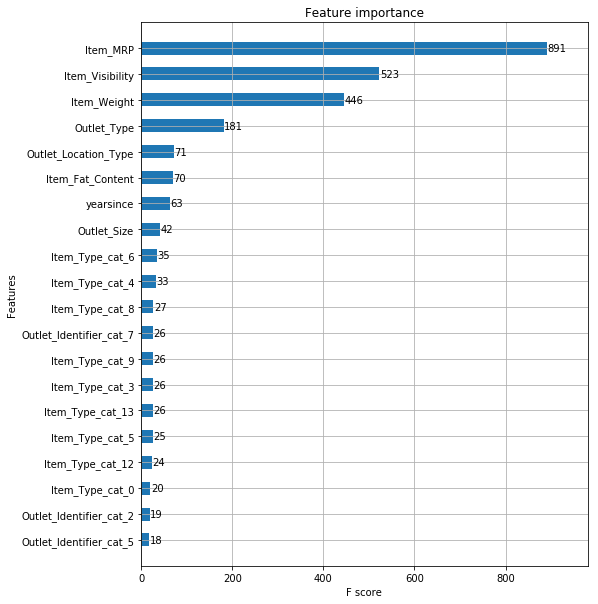

In [511]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
xgb.plot_importance(model, max_num_features=20, height=0.5, ax=ax)

In [512]:
test=test.drop('Item_Outlet_Sales',1).reset_index(drop=True)

In [513]:
xgtest = xgb.DMatrix(test, feature_names=feature)
preds = model.predict(xgtest)

In [514]:
sub=pd.DataFrame()

In [515]:
sub['Item_Identifier']=df1['Item_Identifier']

In [516]:
sub['Outlet_Identifier']=df1['Outlet_Identifier']

In [517]:
sub['Item_Outlet_Sales']=preds

In [518]:
sub.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1469.038208
1,FDW14,OUT017,1369.580444
2,NCN55,OUT010,604.963562
3,FDQ58,OUT017,2480.579590
4,FDY38,OUT027,6301.557617


In [519]:
sub.to_csv('sub.csv',index=False)

In [520]:
xgtrain_pred = xgb.DMatrix(train)

In [521]:
preds = model.predict(xgtrain_pred)

In [522]:
res=pd.DataFrame()

In [523]:
res['act']=df['Item_Outlet_Sales']
res['pred']=preds

In [524]:
res['residual']=res['act']-res['pred']

In [525]:
res.head()

,act,pred,residual
0,3735.1380,4597.670898,-862.532898
1,443.4228,686.287476,-242.864676
2,2097.2700,2160.427246,-63.157246
3,732.3800,584.811584,147.568416
4,994.7052,834.579285,160.125915


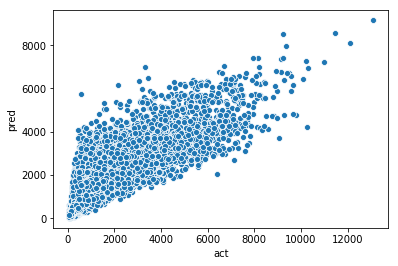

In [526]:
sns.scatterplot(x=res['act'],y=res['pred'])

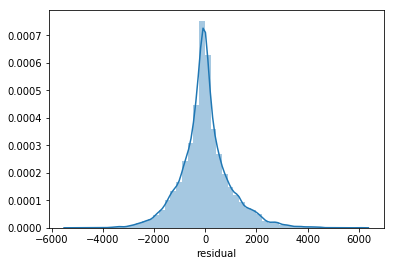

In [527]:
sns.distplot(res['residual'])

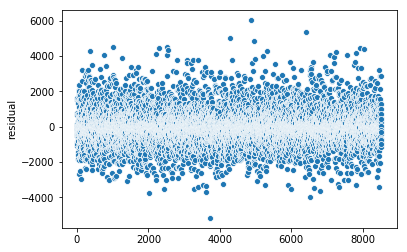

In [528]:
sns.scatterplot(x=res.index,y=res['residual'])

In [529]:
df2.to_csv('full.csv',index=False)